# STOCK MARKET PART 2 - MARKET PREDICTION MODEL

Reference from book ''An Introduction to Statistical Learning''

LOGISTIC MODEL - DIRECTION -> (Returns of previous 5 Days & Volume of share traded on last day)

S&P500 - It is an American stock market index based on the market capitalizations of 500 large companies having common stock listed on the NYSE or NASDAQ.It is considered as one of the best representations of the U.S. stock market

# READING DATASET
#Importing required Libraries

In [11]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

#DataSet obtained from 'Stooq.com',S&P 500 data from year 1789
#Readind csv file

In [12]:
path = '/Users/love/Desktop/Data Programming/S&P500.csv'

In [13]:
df = pd.read_csv(path)
df.head()

,Date,Open,High,Low,Close,Volume
0,1789-05-01,0.51,0.51,0.51,0.51,NaN
1,1789-06-01,0.51,0.51,0.51,0.51,NaN
2,1789-07-01,0.50,0.50,0.50,0.50,NaN
3,1789-08-01,0.50,0.51,0.50,0.51,NaN
4,1789-09-01,0.51,0.51,0.50,0.51,NaN


# DATA CLEANING & TRANSFORMATION

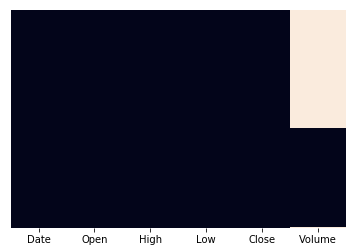

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

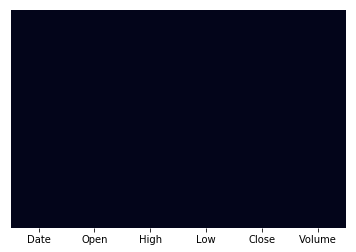

In [15]:
#Removed empty records by picking data from year 1991
#df = df.where(df['Date'] > '1990-12-31').dropna()
df = df.dropna()
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [16]:
df.head()

,Date,Open,High,Low,Close,Volume
20397,1950-01-03,16.66,16.66,16.66,16.66,1400000.0
20398,1950-01-04,16.85,16.85,16.85,16.85,2100000.0
20399,1950-01-05,16.93,16.93,16.93,16.93,2833333.0
20400,1950-01-06,16.98,16.98,16.98,16.98,2233333.0
20401,1950-01-07,17.09,17.09,17.09,17.09,1713333.0


# Calculating returns for each day.Returns are typically defined by:
                  
                  Return at Time (t) = (Price at Time (t) - Price at Time (t-1))/Price at Time (t-1)
 


In [17]:
df['Percentage Return'] = df['Close'].pct_change()
df.tail()

,Date,Open,High,Low,Close,Volume,Percentage Return
37621,2018-02-09,2601.78,2638.67,2532.69,2619.55,986284480.0,0.014936
37622,2018-02-12,2636.75,2672.61,2622.45,2656.00,757736640.0,0.013915
37623,2018-02-13,2646.27,2668.84,2637.08,2662.94,538762304.0,0.002613
37624,2018-02-14,2651.21,2702.10,2648.87,2698.63,632361856.0,0.013402
37625,2018-02-15,2713.46,2731.51,2689.82,2731.20,571606592.0,0.012069


In [18]:
# Converting Volume in millions
df['Volume']=df['Volume']/1000000000

Adding columns to get required predictors & response

Predictors : Lag1 to Lag5 - percentage returns for each of the five previous trading days

Response : Direction - Whether the market was Up or Down on this date

In [19]:
df['Lag1']=np.nan
df['Lag2']=np.nan
df['Lag3']=np.nan
df['Lag4']=np.nan
df['Lag5']=np.nan
df['LagVolume']=np.nan
df.tail()

,Date,Open,High,Low,Close,Volume,Percentage Return,Lag1,Lag2,Lag3,Lag4,Lag5,LagVolume
37621,2018-02-09,2601.78,2638.67,2532.69,2619.55,0.986284,0.014936,NaN,NaN,NaN,NaN,NaN,NaN
37622,2018-02-12,2636.75,2672.61,2622.45,2656.00,0.757737,0.013915,NaN,NaN,NaN,NaN,NaN,NaN
37623,2018-02-13,2646.27,2668.84,2637.08,2662.94,0.538762,0.002613,NaN,NaN,NaN,NaN,NaN,NaN
37624,2018-02-14,2651.21,2702.10,2648.87,2698.63,0.632362,0.013402,NaN,NaN,NaN,NaN,NaN,NaN
37625,2018-02-15,2713.46,2731.51,2689.82,2731.20,0.571607,0.012069,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#Assigning values to Predictors
for i in range (20402,37626):
    df.loc[i,'Lag1']=df.loc[i-1,'Percentage Return']
    df.loc[i,'Lag2']=df.loc[i-2,'Percentage Return']
    df.loc[i,'Lag3']=df.loc[i-3,'Percentage Return'] 
    df.loc[i,'Lag4']=df.loc[i-4,'Percentage Return']
    df.loc[i,'Lag5']=df.loc[i-5,'Percentage Return']
    df.loc[i,'LagVolume']=df.loc[i-1,'Volume']

In [21]:
#Dropping Nan records,Adding Response Column - Direction
df = df.dropna()
df['Direction']=np.nan
df.head()

,Date,Open,High,Low,Close,Volume,Percentage Return,Lag1,Lag2,Lag3,Lag4,Lag5,LagVolume,Direction
20403,1950-01-10,17.03,17.03,17.03,17.03,0.002400,-0.002927,-0.000585,0.006478,0.002953,0.004748,0.011405,0.002800,NaN
20404,1950-01-11,17.09,17.09,17.09,17.09,0.002922,0.003523,-0.002927,-0.000585,0.006478,0.002953,0.004748,0.002400,NaN
20405,1950-01-12,16.76,16.76,16.76,16.76,0.003300,-0.019310,0.003523,-0.002927,-0.000585,0.006478,0.002953,0.002922,NaN
20406,1950-01-13,16.67,16.67,16.67,16.67,0.003700,-0.005370,-0.019310,0.003523,-0.002927,-0.000585,0.006478,0.003300,NaN
20407,1950-01-14,16.65,16.65,16.65,16.65,0.003024,-0.001200,-0.005370,-0.019310,0.003523,-0.002927,-0.000585,0.003700,NaN


In [22]:
#Assigning values to Direction
def def_direction(cols):
    Direction = cols[0]
    PercentageReturn = cols[1]
    if PercentageReturn > 0:
        return 1
    else:
        return 0

In [23]:
df['Direction'] = df[['Direction','Percentage Return']].apply(def_direction,axis=1)
df

,Date,Open,High,Low,Close,Volume,Percentage Return,Lag1,Lag2,Lag3,Lag4,Lag5,LagVolume,Direction
20403,1950-01-10,17.03,17.03,17.03,17.03,0.002400,-0.002927,-0.000585,0.006478,0.002953,0.004748,0.011405,0.002800,0
20404,1950-01-11,17.09,17.09,17.09,17.09,0.002922,0.003523,-0.002927,-0.000585,0.006478,0.002953,0.004748,0.002400,1
20405,1950-01-12,16.76,16.76,16.76,16.76,0.003300,-0.019310,0.003523,-0.002927,-0.000585,0.006478,0.002953,0.002922,0
20406,1950-01-13,16.67,16.67,16.67,16.67,0.003700,-0.005370,-0.019310,0.003523,-0.002927,-0.000585,0.006478,0.003300,0
20407,1950-01-14,16.65,16.65,16.65,16.65,0.003024,-0.001200,-0.005370,-0.019310,0.003523,-0.002927,-0.000585,0.003700,0
20408,1950-01-16,16.72,16.72,16.72,16.72,0.001622,0.004204,-0.001200,-0.005370,-0.019310,0.003523,-0.002927,0.003024,1
20409,1950-01-17,16.86,16.86,16.86,16.86,0.001989,0.008373,0.004204,-0.001200,-0.005370,-0.019310,0.003523,0.001622,1
20410,1950-01-18,16.85,16.85,16.85,16.85,0.001744,-0.000593,0.008373,0.004204,-0.001200,-0.005370,-0.019310,0.001989,0
20411,1950-01-19,16.87,16.87,16.87,16.87,0.001300,0.001187,-0.000593,0.008373,0.004204,-0.001200,-0.005370,0.001744,1
20412,1950-01-20,16.90,16.90,16.90,16.90,0.001600,0.001778,0.001187,-0.000593,0.008373,0.004204,-0.001200,0.001300,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17223 entries, 20403 to 37625
Data columns (total 14 columns):
Date                 17223 non-null object
Open                 17223 non-null float64
High                 17223 non-null float64
Low                  17223 non-null float64
Close                17223 non-null float64
Volume               17223 non-null float64
Percentage Return    17223 non-null float64
Lag1                 17223 non-null float64
Lag2                 17223 non-null float64
Lag3                 17223 non-null float64
Lag4                 17223 non-null float64
Lag5                 17223 non-null float64
LagVolume            17223 non-null float64
Direction            17223 non-null int64
dtypes: float64(12), int64(1), object(1)
memory usage: 2.0+ MB


# LOGISTIC REGRESSION

#Split the data into training set and testing set

Predictors will be  Lag1 to Lag5 and LagVolume

Response will be Direction

In [25]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Percentage Return',
       'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'LagVolume', 'Direction'],
      dtype='object')

In [26]:
df_train = df.where(df['Date'] < '2016-12-31').dropna()
df_train = df_train.copy()
df_train

,Date,Open,High,Low,Close,Volume,Percentage Return,Lag1,Lag2,Lag3,Lag4,Lag5,LagVolume,Direction
20403,1950-01-10,17.03,17.03,17.03,17.03,0.002400,-0.002927,-0.000585,0.006478,0.002953,0.004748,0.011405,0.002800,0.0
20404,1950-01-11,17.09,17.09,17.09,17.09,0.002922,0.003523,-0.002927,-0.000585,0.006478,0.002953,0.004748,0.002400,1.0
20405,1950-01-12,16.76,16.76,16.76,16.76,0.003300,-0.019310,0.003523,-0.002927,-0.000585,0.006478,0.002953,0.002922,0.0
20406,1950-01-13,16.67,16.67,16.67,16.67,0.003700,-0.005370,-0.019310,0.003523,-0.002927,-0.000585,0.006478,0.003300,0.0
20407,1950-01-14,16.65,16.65,16.65,16.65,0.003024,-0.001200,-0.005370,-0.019310,0.003523,-0.002927,-0.000585,0.003700,0.0
20408,1950-01-16,16.72,16.72,16.72,16.72,0.001622,0.004204,-0.001200,-0.005370,-0.019310,0.003523,-0.002927,0.003024,1.0
20409,1950-01-17,16.86,16.86,16.86,16.86,0.001989,0.008373,0.004204,-0.001200,-0.005370,-0.019310,0.003523,0.001622,1.0
20410,1950-01-18,16.85,16.85,16.85,16.85,0.001744,-0.000593,0.008373,0.004204,-0.001200,-0.005370,-0.019310,0.001989,0.0
20411,1950-01-19,16.87,16.87,16.87,16.87,0.001300,0.001187,-0.000593,0.008373,0.004204,-0.001200,-0.005370,0.001744,1.0
20412,1950-01-20,16.90,16.90,16.90,16.90,0.001600,0.001778,0.001187,-0.000593,0.008373,0.004204,-0.001200,0.001300,1.0


In [27]:
df_test = df.where(df['Date'] > '2016-12-31').dropna()
df_test = df_test.copy()
df_test

,Date,Open,High,Low,Close,Volume,Percentage Return,Lag1,Lag2,Lag3,Lag4,Lag5,LagVolume,Direction
37343,2017-01-03,2251.57,2263.88,2245.13,2257.83,0.644641,0.008487,-0.004637,-0.000293,-0.008357,0.002248,0.001252,0.540390,1.0
37344,2017-01-04,2261.60,2272.82,2261.60,2270.75,0.563923,0.005722,0.008487,-0.004637,-0.000293,-0.008357,0.002248,0.644641,1.0
37345,2017-01-05,2268.18,2271.50,2260.45,2269.00,0.563718,-0.000771,0.005722,0.008487,-0.004637,-0.000293,-0.008357,0.563923,0.0
37346,2017-01-06,2271.14,2282.10,2264.06,2276.98,0.482665,0.003517,-0.000771,0.005722,0.008487,-0.004637,-0.000293,0.563718,1.0
37347,2017-01-09,2273.59,2275.49,2268.90,2268.90,0.530641,-0.003549,0.003517,-0.000771,0.005722,0.008487,-0.004637,0.482665,0.0
37348,2017-01-10,2269.72,2279.27,2265.27,2268.90,0.592543,0.000000,-0.003549,0.003517,-0.000771,0.005722,0.008487,0.530641,0.0
37349,2017-01-11,2268.60,2275.32,2260.83,2275.32,0.545656,0.002830,0.000000,-0.003549,0.003517,-0.000771,0.005722,0.592543,1.0
37350,2017-01-12,2271.14,2271.78,2254.25,2270.44,0.475570,-0.002145,0.002830,0.000000,-0.003549,0.003517,-0.000771,0.545656,0.0
37351,2017-01-13,2272.74,2278.68,2271.51,2274.64,0.483108,0.001850,-0.002145,0.002830,0.000000,-0.003549,0.003517,0.475570,1.0
37352,2017-01-17,2269.14,2272.08,2262.81,2267.89,0.604284,-0.002968,0.001850,-0.002145,0.002830,0.000000,-0.003549,0.483108,0.0


In [28]:
x_train = df_train[['Lag1','Lag2','Lag3','Lag4','Lag5','LagVolume']] 
y_train = df_train['Direction']
x_test = df_test[['Lag1','Lag2','Lag3','Lag4','Lag5','LagVolume']] 
y_test = df_test['Direction']

Train and fit a logistic regression model on the training set

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
logmodel = LogisticRegression(class_weight='balanced')
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

# Predictions and Evaluations

In [31]:
predictions = logmodel.predict(x_test)

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [33]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.42      0.45      0.44       119
        1.0       0.58      0.54      0.56       164

avg / total       0.51      0.51      0.51       283



It says  - “Past performance is not an indicator of future success”...
 
This quote shows up at the end of ads for mutual funds, hedge funds — really, any promo for investment advice. The irony of that statement is, of course, that it came after you’d just been told how well that investment had done in the past.

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [35]:
df.set_index('Date', inplace=True)

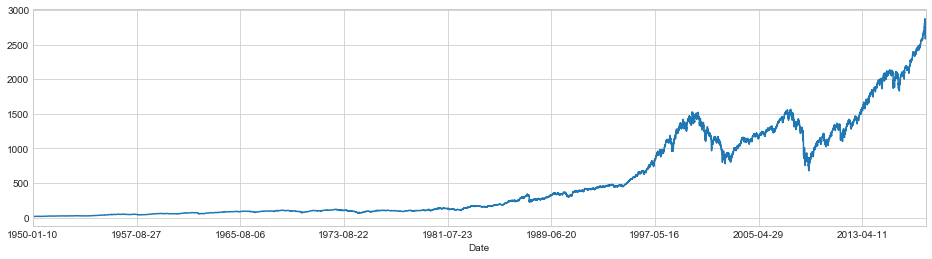

In [36]:
df['Close'].plot(figsize=(16,4),label='S&P500')

# Increasing accuracy of Prediction Model

Only considering training data from 2012 to 2016

In [45]:
df_train2 = df_train.where(df_train['Date']>'2011-12-31').dropna()
df_train2

,Date,Open,High,Low,Close,Volume,Percentage Return,Lag1,Lag2,Lag3,Lag4,Lag5,LagVolume,Direction
36085,2012-01-03,1258.86,1284.62,1258.86,1277.06,0.662834,0.015474,-0.004291,0.010707,-0.012478,0.000079,0.009035,0.423246,1.0
36086,2012-01-04,1277.03,1278.73,1268.10,1277.30,0.613439,0.000188,0.015474,-0.004291,0.010707,-0.012478,0.000079,0.662834,1.0
36087,2012-01-05,1277.30,1283.05,1265.26,1281.06,0.661155,0.002944,0.000188,0.015474,-0.004291,0.010707,-0.012478,0.613439,1.0
36088,2012-01-06,1280.93,1281.84,1273.34,1277.81,0.586058,-0.002537,0.002944,0.000188,0.015474,-0.004291,0.010707,0.661155,0.0
36089,2012-01-09,1277.83,1281.99,1274.55,1280.70,0.582421,0.002262,-0.002537,0.002944,0.000188,0.015474,-0.004291,0.586058,1.0
36090,2012-01-10,1280.77,1296.46,1280.77,1292.08,0.654348,0.008886,0.002262,-0.002537,0.002944,0.000188,0.015474,0.582421,1.0
36091,2012-01-11,1292.02,1293.80,1285.41,1292.48,0.568835,0.000310,0.008886,0.002262,-0.002537,0.002944,0.000188,0.654348,1.0
36092,2012-01-12,1292.48,1296.82,1285.77,1295.50,0.580344,0.002337,0.000310,0.008886,0.002262,-0.002537,0.002944,0.568835,1.0
36093,2012-01-13,1294.82,1294.82,1277.58,1289.09,0.656794,-0.004948,0.002337,0.000310,0.008886,0.002262,-0.002537,0.580344,0.0
36094,2012-01-17,1290.22,1303.00,1290.22,1293.67,0.643308,0.003553,-0.004948,0.002337,0.000310,0.008886,0.002262,0.656794,1.0


In [47]:
x_train2 = df_train2[['Lag1','Lag2','Lag3','Lag4','Lag5','LagVolume']] 
y_train2 = df_train2['Direction']

In [48]:
logmodel = LogisticRegression(class_weight='balanced')
logmodel.fit(x_train2,y_train2)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [49]:
predictions = logmodel.predict(x_test)

In [50]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.44      0.78      0.57       119
        1.0       0.64      0.29      0.40       164

avg / total       0.56      0.49      0.47       283



A possible trading strategy of buying stocks when model predicts UP and avoid trading when market predict DOWN.
Disclamer : TRY AT YOUR OWN RISK